### Natural Language Processing : Emotion Classification Of Text 
+ Text Classification
+ Sentiment Analysis 

### Dataset Credit
+ https://github.com/Jcharis

***Importing the dependencies***

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import neattext.functions as nfx
from matplotlib import pyplot as plt 


***Data Preprocessing***

In [2]:
# Loading the dataset into Pandas 

path = "Emotion dataset.csv"
data = pd.read_csv(path)

In [3]:
data.head(4)

,Unnamed: 0,Emotion,Text,Unnamed: 3
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,NaN
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,NaN
3,3,joy,Such an eye ! The true hazel eye-and so brilli...,NaN


In [4]:
# Checking the size of the dataset 

data.shape

(34792, 4)

In [5]:
data.isnull().sum()

Unnamed: 0        0
Emotion           0
Text              0
Unnamed: 3    34792
dtype: int64

In [6]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
# Dropping the ['Unnamed: 0','Unnamed: 3'] columns as they are not needed

data.drop(columns=['Unnamed: 0','Unnamed: 3'],axis=1,inplace=True)

In [8]:
data.columns

Index(['Emotion', 'Text'], dtype='object')

In [9]:
data["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

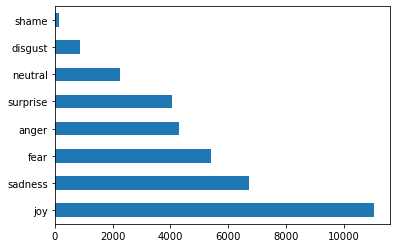

In [10]:
# Plotting the Emotion colums to see the grapghical representation 

data["Emotion"].value_counts().plot(kind="barh")
plt.show()

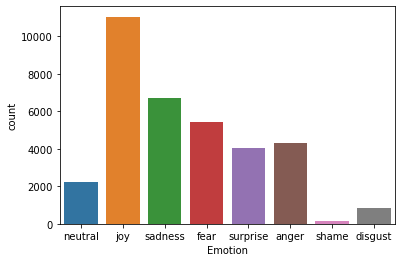

In [11]:
# Using seaborn 

sns.countplot(x=data["Emotion"],orient="v", data=data)
plt.show()

### Exploratory Data Analysis
+ Text Cleaning 
+ Sentiment Analysis
+ Keywords Extraction 
 - Keywords From Emotions 
 - Word Cloud 

In [12]:
# Imprting textblob library
# TextBlob is a simple library which supports complex analysis and operations on textual data.

from textblob import TextBlob


# Creating get-sentiment function 

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.polarity
    if sentiment > 0 :
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [13]:
# Testing the function
get_sentiment("I Love data science")

'Positive'

In [14]:
get_sentiment("I hate politics ")

'Negative'

In [15]:
get_sentiment("Our leaders disgusts me")

'Neutral'

In [16]:
# Creating a new columns [sentiment] and apllying the function above 

data["Sentiment"] = data["Emotion"].apply(get_sentiment)

In [17]:
data.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Positive
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Neutral
3,joy,Such an eye ! The true hazel eye-and so brilli...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Positive


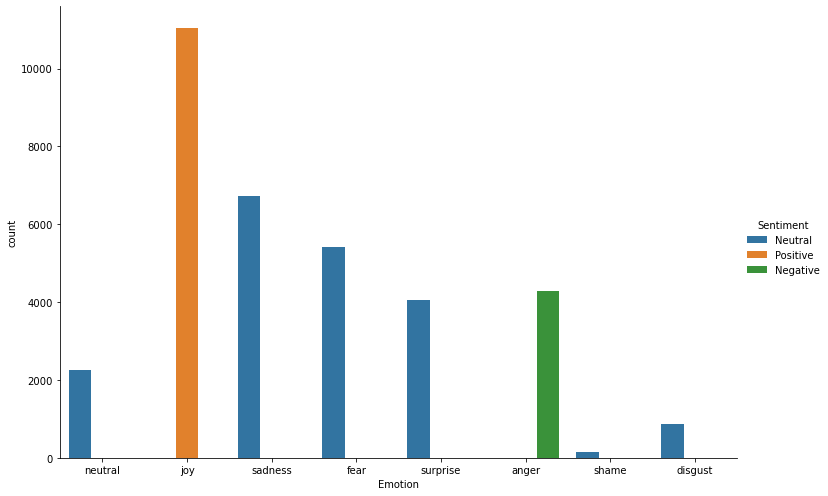

In [18]:
sns.catplot(x="Emotion",hue="Sentiment",data=data, aspect=1.5, kind="count",height=7)
plt.show()

### Text Cleaning
+ Removing of noise 
 - Stop Words 
 - Special Words 
 - Punctuations 
 - Emojis

In [19]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
# Creating a new dataFrame for the cleaned text

data["Clean_text"] = data["Text"].apply(nfx.remove_stopwords)
data["Clean_text"] = data["Clean_text"].apply(nfx.remove_userhandles)
data["Clean_text"] = data["Clean_text"].apply(nfx.remove_punctuations)

In [21]:
data[["Text","Clean_text"]][0:5]

,Text,Clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brilli...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


### Keyword Extraction
+ Extracting the most common key words

In [22]:
# importing the Counter library 

from collections import Counter

# Definning the extraction function 

def extract_keywords (text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [23]:
# List of emotions

emotion_list = data["Emotion"].unique().tolist()

In [24]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [25]:
# Converting all the "joy" Emotions into list 

joy_list = data[data["Emotion"]=='joy']["Clean_text"].tolist()
joy_list

['Sage Act upgrade list tommorow',
 'eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness ',
 '  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang',
 'life  Leopold truly happy : hopes prayers beloved son come fruition ',
 'feeling fail french #fuckfrench',
 'GoodLet  ',
 'fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile',
 'terribly ecstatic dangerous thing ',
 'selected study university',
 'Yeah  ’ ages  ',
 'passed BA exams class results',
 'heard selected fot year university Zambia form Chikola secondary school',
 'Welp time study days',
 'Heading campus rain grad photos',
 'feeling awesome ',
 '  brings  Ive bought Christmas presents trawl loads shops :)',
 'shit pants Pure 100% gravy',
 'life  Leopold

In [26]:
# Join all Text in  "joy list" into a docx 

joy_docx = " ". join(joy_list)
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

### Extracting and Plotting the keywords

In [27]:
joy_keyowrds = extract_keywords(joy_docx)

In [28]:
# Creating a plot function
def plot_most_common_keywords(mydict,emotion_names):
    df_1 = pd.DataFrame(mydict.items(), columns=["Token","Count"])
    plt.figure(figsize=(20,10))
    plt.title("plot of {} most common keywords".format(emotion_names))
    sns.barplot(x = "Token" ,y = "Count", data = df_1)
    plt.xticks(rotation=45)
    plt.show()

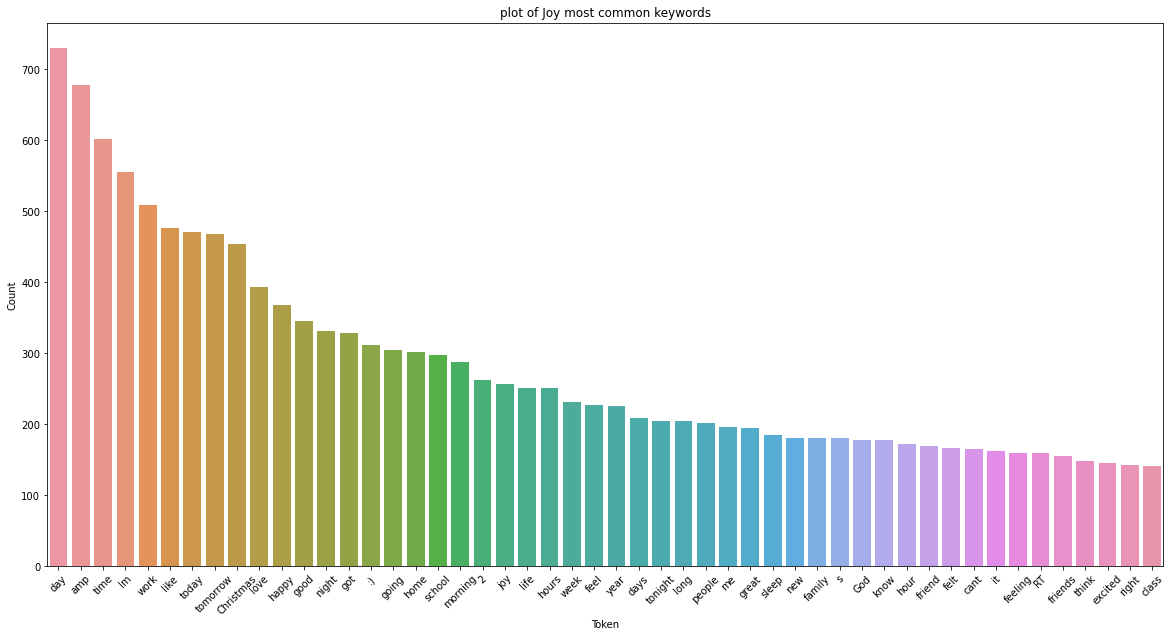

In [29]:
plot_most_common_keywords(joy_keyowrds,"Joy")

### FOR SURPRISE 

In [30]:
# Making a list of all the surprsie emotions in the text 
surprise_list = data[data["Emotion"]=='surprise']["Clean_text"].tolist()
# joinning all the words together 
surprise_docx = " ". join(surprise_list)
# Extracting the surprise keywords 
surprise_keyowrds = extract_keywords(surprise_docx)
# Creating a plot function
def plot_most_common_keywords(mydict,emotion_names):
    df_2 = pd.DataFrame(mydict.items(), columns=["Token","Count"])
    plt.figure(figsize=(20,10))
    plt.title("plot of {} most common keywords".format(emotion_names))
    sns.barplot(x = "Token" ,y = "Count", data = df_2)
    plt.xticks(rotation=45)
    plt.show()

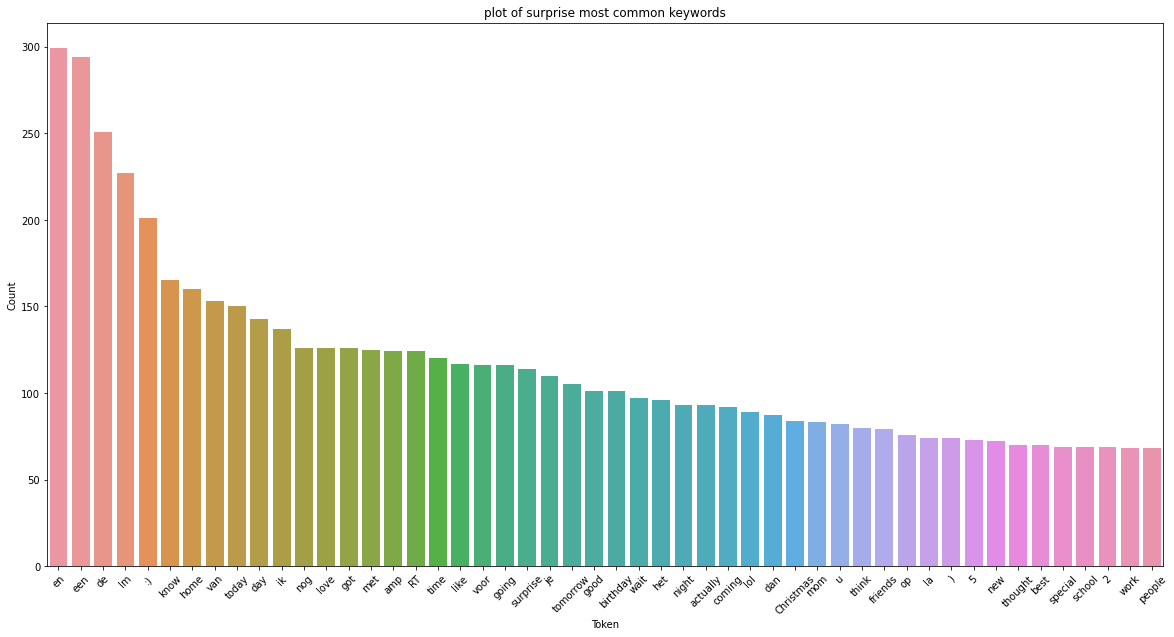

In [31]:
plot_most_common_keywords(surprise_keyowrds,"surprise")

### For Sadness

In [32]:
# Making a list of all the sad emotions in the text 
sadness_list = data[data["Emotion"]=='sadness']["Clean_text"].tolist()
# joinning all the words together 
sadness_docx = " ". join(sadness_list)
# Extracting the sad keywords 
sadness_keyowrds = extract_keywords(sadness_docx)
# Creating a plot function
def plot_most_common_keywords(mydict,emotion_names):
    df_3 = pd.DataFrame(mydict.items(), columns=["Token","Count"])
    plt.figure(figsize=(20,10))
    plt.title("plot of {} most common keywords".format(emotion_names))
    sns.barplot(x = "Token" ,y = "Count", data = df_3)
    plt.xticks(rotation=45)
    plt.show()

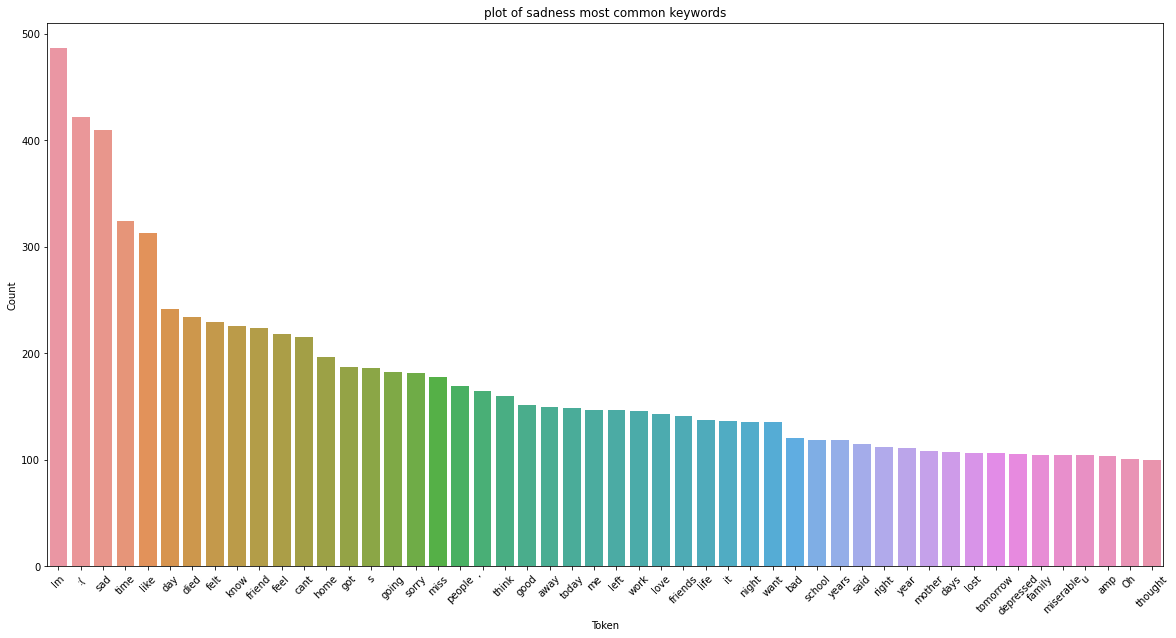

In [33]:
plot_most_common_keywords(sadness_keyowrds,"sadness")

### For Anger

In [34]:
# Making a list of all the Anger emotions in the text 
anger_list = data[data["Emotion"]=='anger']["Clean_text"].tolist()
# joinning all the words together 
anger_docx = " ". join(anger_list)
# Extracting the sad keywords 
anger_keyowrds = extract_keywords(anger_docx)
# Creating a plot function
def plot_most_common_keywords(mydict,emotion_names):
    df_4 = pd.DataFrame(mydict.items(), columns=["Token","Count"])
    plt.figure(figsize=(20,10))
    plt.title("plot of {} most common keywords".format(emotion_names))
    sns.barplot(x = "Token" ,y = "Count", data = df_4)
    plt.xticks(rotation=45)
    plt.show()


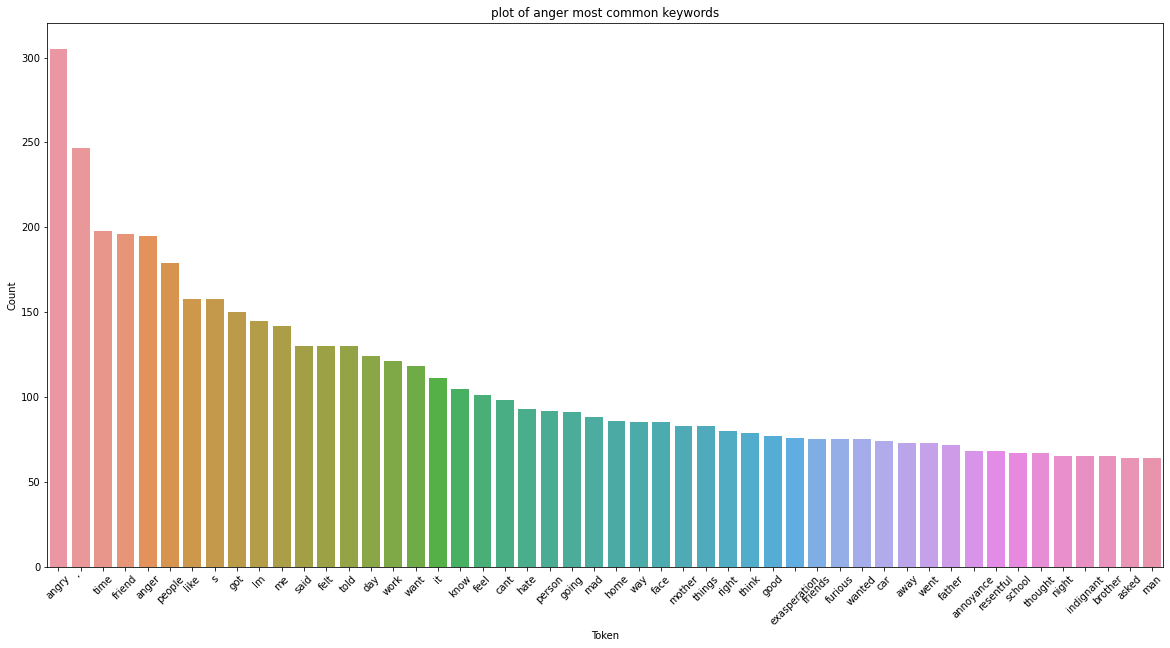

In [35]:
plot_most_common_keywords(anger_keyowrds,"anger")

### For Fear

In [36]:
# Making a list of all the Fear emotions in the text 
fear_list = data[data["Emotion"]=='fear']["Clean_text"].tolist()
# joinning all the words together 
fear_docx = " ". join(fear_list)
# Extracting the sad keywords 
fear_keyowrds = extract_keywords(fear_docx)
# Creating a plot function
def plot_most_common_keywords(mydict,emotion_names):
    df_5 = pd.DataFrame(mydict.items(), columns=["Token","Count"])
    plt.figure(figsize=(20,10))
    plt.title("plot of {} most common keywords".format(emotion_names))
    sns.barplot(x = "Token" ,y = "Count", data = df_5)
    plt.xticks(rotation=45)
    plt.show()


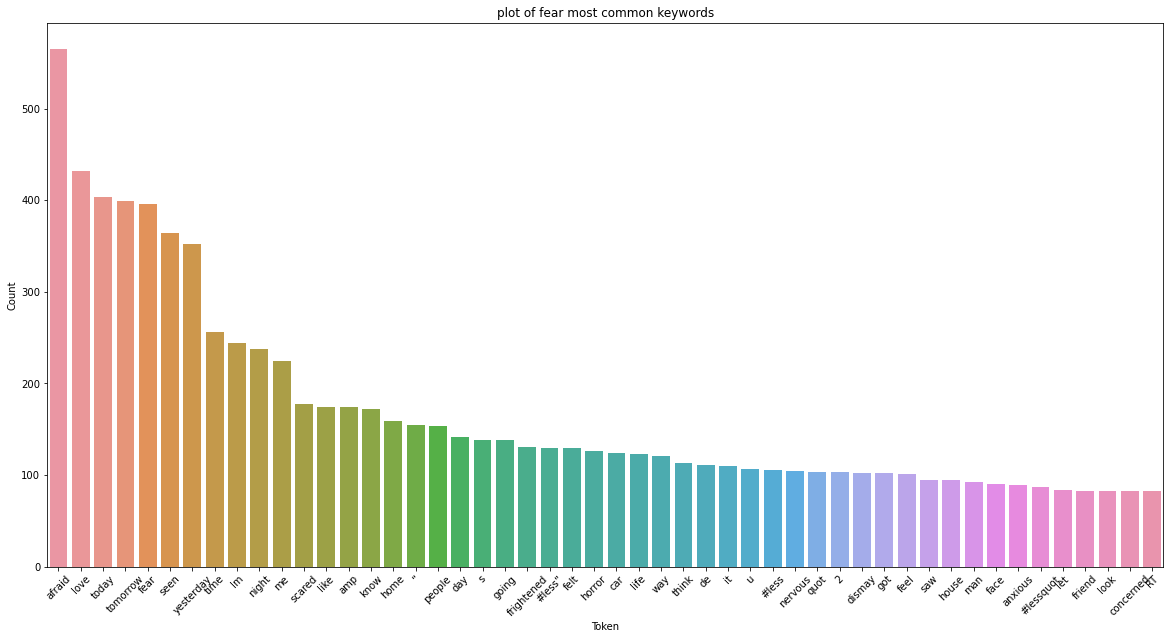

In [37]:
plot_most_common_keywords(fear_keyowrds,"fear")

### Word Cloud

In [38]:
from wordcloud import WordCloud

In [39]:
# Definning word cloud function 

def plot_wordcloud (docx,emotion_names):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.title("plot of {} wordcloud".format(emotion_names))
    plt.imshow(mywordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

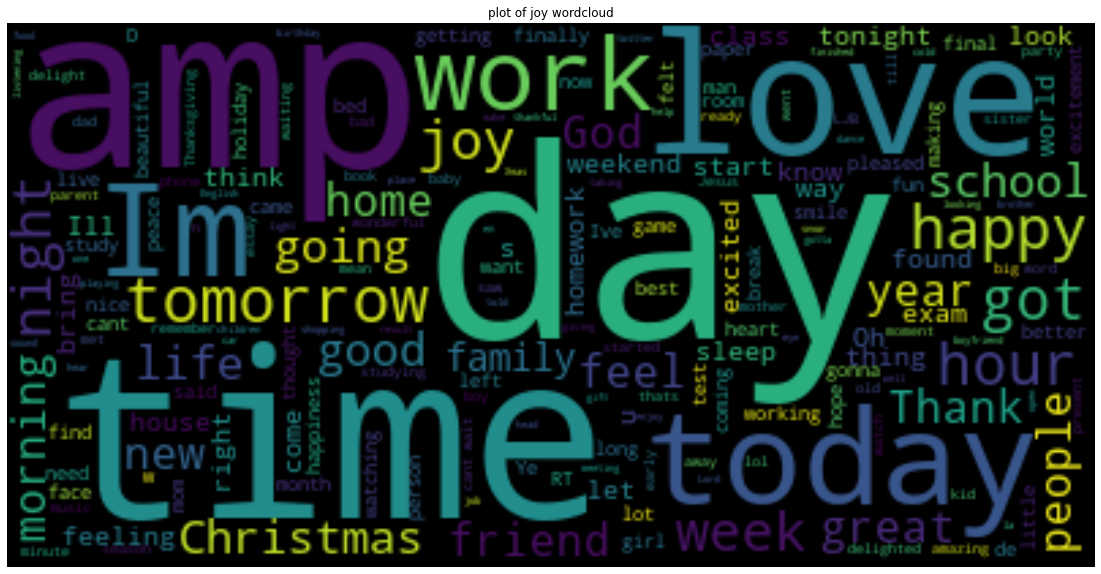

In [40]:
plot_wordcloud(joy_docx,"joy")

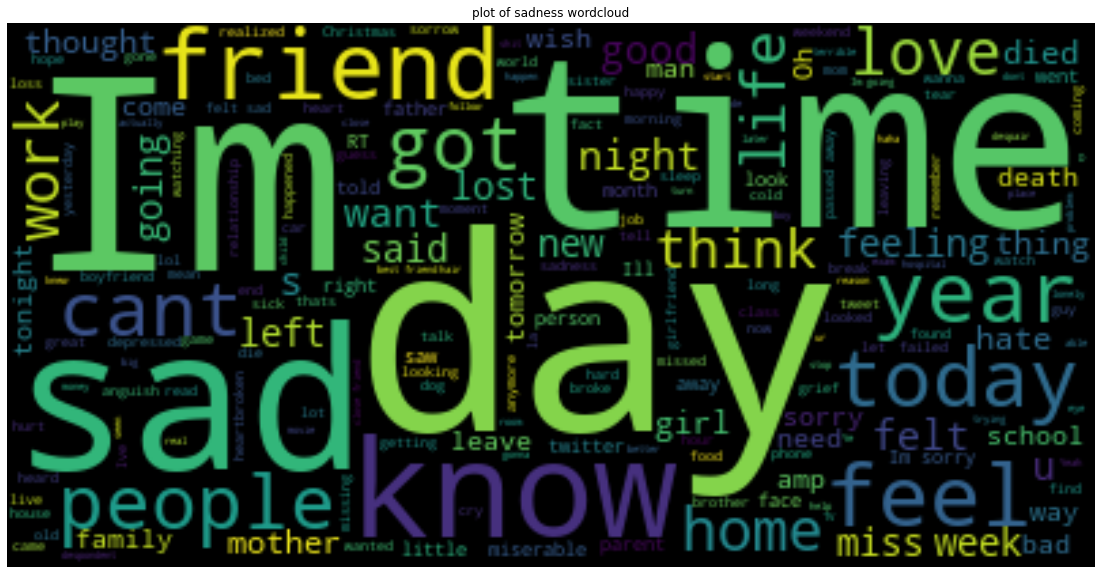

In [41]:
plot_wordcloud(sadness_docx,"sadness")

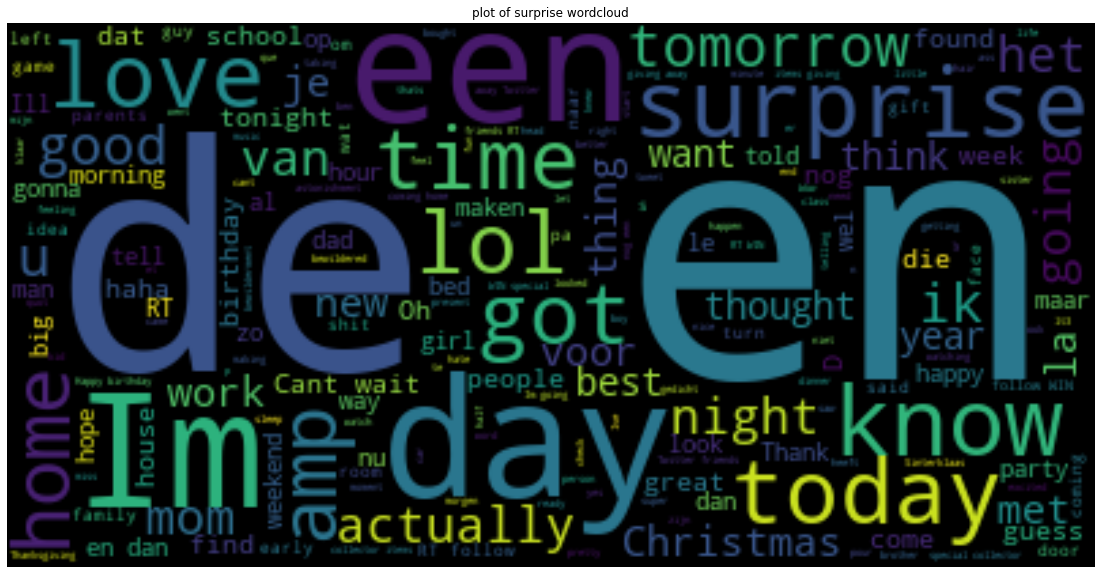

In [42]:
plot_wordcloud(surprise_docx,"surprise")

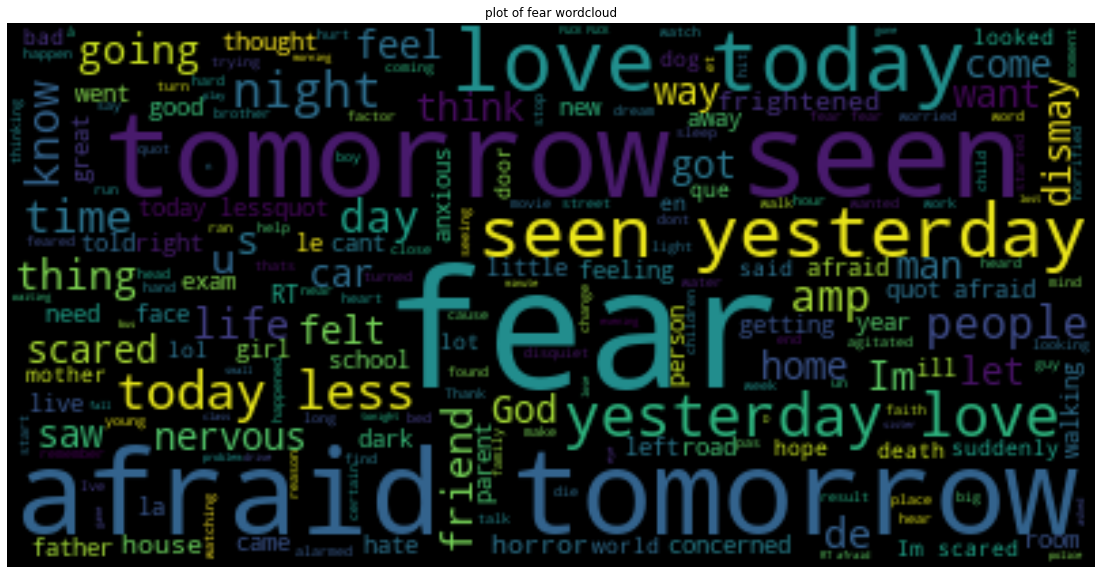

In [43]:
plot_wordcloud(fear_docx,"fear")

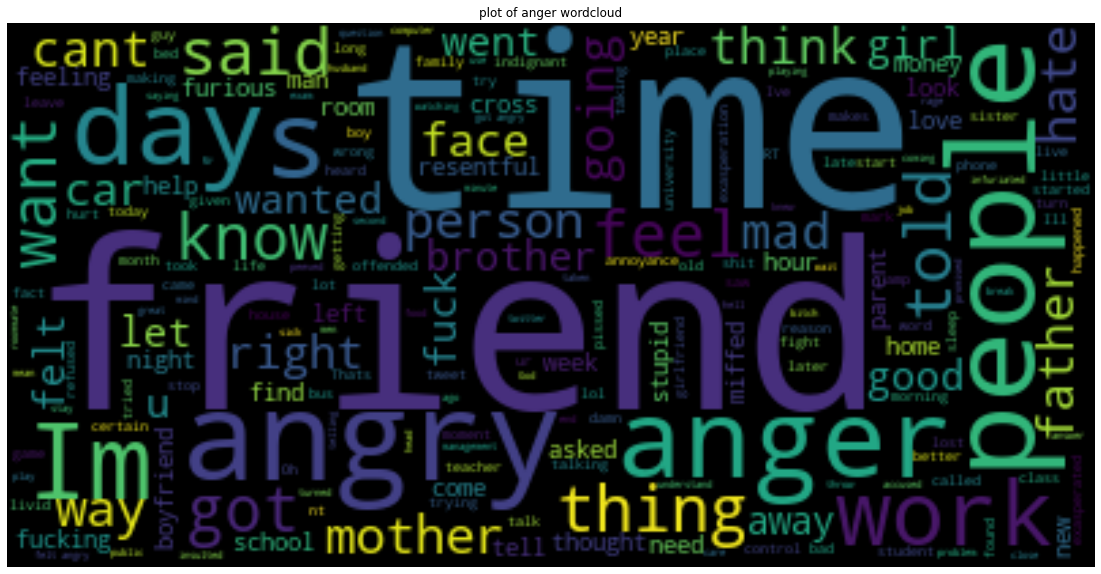

In [44]:
plot_wordcloud(anger_docx,"anger")

## MACHINE LEARNING
+ Naive bayes
+ LogisticRegression 
+ Decision Tree

In [45]:
# Ml Libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [46]:
# Separating the features and labels

features = data["Clean_text"]
label = data["Emotion"]

In [47]:
# create a vectorizer object 

cv = CountVectorizer()
tf_vect = TfidfVectorizer()

X = cv.fit_transform(features)


In [48]:
cv.get_feature_names()

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [49]:
# Spliting data into training and testing 

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,label,random_state=42,test_size=42)

In [50]:
# Naive bayes Model 

# Creating a Naive bayes object 
nb_model = MultinomialNB()

# Fitting the training data
nb_model.fit(Xtrain,Ytrain)

MultinomialNB()

In [51]:
# Getting the training score 

nb_model.score(Xtest,Ytest)

0.5476190476190477

In [52]:
y_pred = nb_model.predict(Xtest)

In [53]:
# Building a prediction system 

sample_text = ["I love data science because it gives me a sense of purpose in life"]
sample_vect = cv.transform(sample_text).toarray()
nb_model.predict(sample_vect)

array(['joy'], dtype='<U8')

In [54]:
nb_model.predict_proba(sample_vect)

array([[4.82019482e-04, 3.07580444e-07, 1.98506378e-02, 9.76860553e-01,
        2.57329910e-10, 2.79382585e-03, 1.02642152e-13, 1.26557891e-05]])

In [55]:
nb_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [56]:
np.max(nb_model.predict_proba(sample_vect))

0.9768605532273874

In [57]:
# Classification Report (NB)

report = classification_report(y_pred,Ytest)
print(report)

              precision    recall  f1-score   support

       anger       0.29      0.50      0.36         4
        fear       0.80      0.80      0.80         5
         joy       0.92      0.48      0.63        23
     neutral       0.00      0.00      0.00         0
     sadness       0.56      0.56      0.56         9
    surprise       0.25      1.00      0.40         1

    accuracy                           0.55        42
   macro avg       0.47      0.56      0.46        42
weighted avg       0.75      0.55      0.60        42



C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
confussion = confusion_matrix (y_pred,Ytest)

In [59]:
confussion

array([[ 2,  1,  0,  0,  1,  0],
       [ 0,  4,  0,  0,  1,  0],
       [ 5,  0, 11,  3,  2,  2],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  5,  1],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


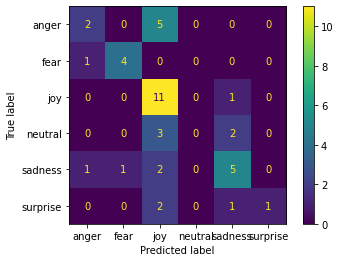

In [60]:
plot_confusion_matrix(nb_model,Xtest,Ytest)

In [61]:
# Definning a prediction function 

def predict_emotion (sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    pred = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    percentage = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{}, prediction score:{}".format(pred[0],np.max(pred_proba)))
    return percentage

In [62]:
predict_emotion(sample_text,nb_model)

Prediction:joy, prediction score:0.9768605532273874


{'anger': 0.00048201948152168383,
 'disgust': 3.0758044352192674e-07,
 'fear': 0.019850637812869606,
 'joy': 0.9768605532273874,
 'neutral': 2.5732991010014944e-10,
 'sadness': 0.0027938258512004693,
 'shame': 1.0264215228135313e-13,
 'surprise': 1.265578914227327e-05}

### SAVING THE MODEL

In [63]:
import pickle 
import joblib 

filename = "Naive_Bayes_model_For_Emotion_Classification_25_01_2023.sav"
pickle.dump(nb_model,open(filename,"wb"))

### LINEAR MODEL

In [64]:
# LINEAR MODEL

# creating the model object 
lr_model = LogisticRegression()

# fitting the data into the model for training 
lr_model.fit(Xtrain,Ytrain)

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
# Getting the accuracy 

lr_model.score(Xtest,Ytest)

0.6666666666666666

In [66]:
# Using a Single prediction 

predict_emotion(sample_text,lr_model)

Prediction:joy, prediction score:0.8159769731653073


{'anger': 0.0012147562238229246,
 'disgust': 0.006580142478454741,
 'fear': 0.16943782142759653,
 'joy': 0.8159769731653073,
 'neutral': 1.421816703503812e-05,
 'sadness': 0.003709391319961895,
 'shame': 2.8226304021689334e-05,
 'surprise': 0.0030384709137999105}

### DECISION TREE

In [67]:
data["Emotion"].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [68]:
# Creating a function to Encode the Emotions to compatability with decision Tree model 

def assignNewlabel (label):
    if label == 'neutral':
        return 0
    elif label == 'joy':
        return 1
    elif label == 'sadness':
        return 2
    elif label ==  'fear':
        return 3
    elif label == 'surprise':
        return 4
    elif label == 'anger':
        return 5
    elif label == 'shame':
        return 6
    elif label == 'disgust':
        return 7
    else:
        return -1

In [69]:
# Aplying the created Function 

data['Encoded_Emotion'] = data["Emotion"].apply(assignNewlabel)

In [70]:
x = X # X still carries the same features with the Vectorised one above 
y = data["Encoded_Emotion"] # Encoded Label will be the target for decision tree classifier 

In [71]:
# Splitting the dataset for Decision classification 

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Creating a Tree Object and fitting into it the training data 

Tree = DecisionTreeClassifier()

Tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [75]:
# Accuracy score 

Tree.score(xtest,ytest)

0.5409082199655106

### MODEL INTERPRETATION
+  Using Eli5 to Interprete the Logistic Regression Model  

In [76]:
import eli5

# Show the Weights for each class

eli5.show_weights(lr_model,top=20)

In [77]:
# Show Weights With feature names 

class_names = label.unique().tolist()
feature_names = cv.get_feature_names_out()
eli5.show_weights(lr_model,feature_names=feature_names ,target_names = class_names, top=10)

### Thank you!
### Olatunde 